In [1]:
import yaml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from doa.utils import create_dataset

In [2]:
# Create molecular descriptors

We can use Mordred to quickly generate a set of descriptors. We have provides a function in doa/utils to prepare a dataset in 
the form required by the res of the DoA calculations 

In [ ]:
_  = create_dataset(csv_path='sample_data/data.csv', 
                smiles_column='SMILES',
                logs_column='Solubility', 
                save_path='sample_data/des_data.csv')

The descriptors will be saved to 'sample_data/des_data.csv'

In [4]:
### Execute the following command to run a large number of ML models to find the prediction errors made for each molecule

In [5]:
!python ../scripts/run_models.py --config ../scripts/configs/main.yaml --run-id=1

outlier detection using extratrees regression
100%|█████████████████████████████████████████| 250/250 [32:56<00:00,  7.90s/it]


In [7]:
# Once completed, we will have "smiles_error_et_{i}.pkl" files in the folder specified by "res_path" in the configuration file (i.e ../scripts/configs/main.yaml).

In [8]:
### Execute the following command for post processing and create the files required for further analysis.

In [2]:
!python ../scripts/post_process.py  --config ../scripts/configs/main.yaml

min : 11 mean:  25.0 sdev:  4.869702249624714
percent:  0.95
percent:  0.9
percent:  0.85
percent:  0.8
percent:  0.75
percent:  0.7
percent:  0.65


In [4]:

opt = yaml.load(open('../scripts/configs/main.yaml'), Loader=yaml.FullLoader)
from doa.detect import find_olpercent
olp_versus_r2, enpls, df = find_olpercent(data_path=opt['data_path'], res_path=opt['res_path'], rerun_threshold_detection=False)


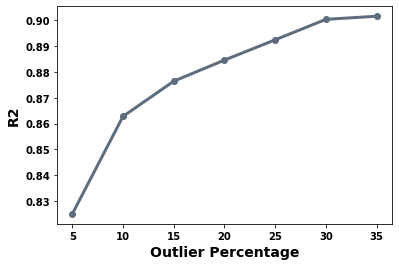

In [5]:
plt.plot(olp_versus_r2.olp, olp_versus_r2.r2,  color='#5D6D7E', marker='o', ls='-', lw=3);
# plt.plot(m4.olp, m4.r2, 'o-', color='orange', label='ol-ness sdev away');

plt.ylabel("R2", fontsize=14, fontweight='bold')
plt.xlabel("Outlier Percentage", fontsize=14, fontweight='bold')
plt.xticks(fontsize=10, fontweight='bold');
plt.yticks(fontsize=10, fontweight='bold');

In [7]:
print(olp_versus_r2.loc[np.where((olp_versus_r2.r2>.89))[0][0], 'olp'])
th_file_id = olp_versus_r2.loc[np.where((olp_versus_r2.r2>.89))[0][0], 'prolp']
print(th_file_id)

25.0
4
